In [ ]:
# Instalar librerias necesarias
#! pip install pandas
#! pip install numpy
#! pip install matplotlib
#! pip install seaborn
#! pip install scikit-learn

In [1]:
# carga de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones opcionales para gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [5]:
# Cambia la ruta al nombre de tu archivo
df = pd.read_csv('DATA-pcv-marzo-2025.csv', encoding='utf-8', sep=';')

# Vista rápida de los primeros registros
df.head()

,PATENTE,AÑO GIRO,AÑO FABRI.,MONTO PAGADO,TIPO PAGO,FECHA PAGO,MODULO ATENCION,TIPO VEHICULO,MARCA,MODELO,COLOR,CODIGO SII
0,AA1739,2025,1977,33715,TOTAL,45717,WEB,CAMIONETA,CHEVROLET,CC-10703,CREMA,CT500005
1,BKRC92,2024,2009,17686,2° Cuota,45717,WEB,furgón,CHANGAN,CARGO VAN,BLANCO,CO470001
2,BKRC92,2025,2009,16858,1°Cuota,45717,WEB,furgón,CHANGAN,CARGO VAN,BLANCO,CO470001
3,BPBJ23,2025,2008,33715,TOTAL,45717,WEB,STATION WAGON,MAZDA,CX7,ROJO,SU1600028
4,BPBL98,2025,2007,33715,TOTAL,45717,WEB,AUTOMOVIL,CHRYSLER,SEBRING TOURING,BLANCO,SD510039


In [6]:
# Reemplazar espacios en nombres de columnas
df.columns = df.columns.str.replace(' ', '_')


In [7]:
# Dimensiones
print("Filas y columnas:", df.shape)

# Tipos de datos y no nulos
df.info()

# Estadísticas básicas
df.describe()


Filas y columnas: (45875, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45875 entries, 0 to 45874
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PATENTE          45875 non-null  object
 1   AÑO_GIRO         45875 non-null  int64 
 2   AÑO_FABRI.       45875 non-null  int64 
 3   MONTO_PAGADO     45875 non-null  int64 
 4   TIPO_PAGO        45875 non-null  object
 5   FECHA_PAGO       45875 non-null  int64 
 6   MODULO_ATENCION  45875 non-null  object
 7   TIPO_VEHICULO    45875 non-null  object
 8   MARCA            45875 non-null  object
 9   MODELO           45875 non-null  object
 10  COLOR            45875 non-null  object
 11  CODIGO_SII       45875 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.2+ MB


,AÑO_GIRO,AÑO_FABRI.,MONTO_PAGADO,FECHA_PAGO
count,45875.000000,45875.000000,4.587500e+04,45875.000000
mean,2024.862082,2009.652948,4.221028e+04,45738.420861
std,0.913540,6.724328,4.859480e+04,8.466740
min,2000.000000,1930.000000,0.000000e+00,45717.000000
25%,2025.000000,2006.000000,3.371500e+04,45733.000000
50%,2025.000000,2010.000000,3.371500e+04,45741.000000
75%,2025.000000,2014.000000,3.371500e+04,45746.000000
max,2025.000000,2025.000000,2.481770e+06,45747.000000


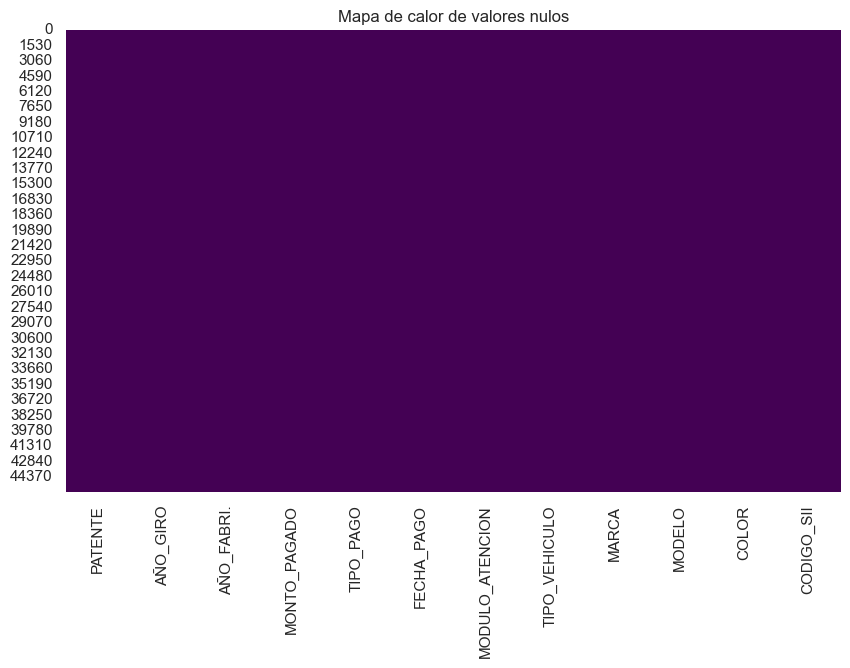

In [8]:
# Total de valores nulos por columna
df.isnull().sum()

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de calor de valores nulos")
plt.show()


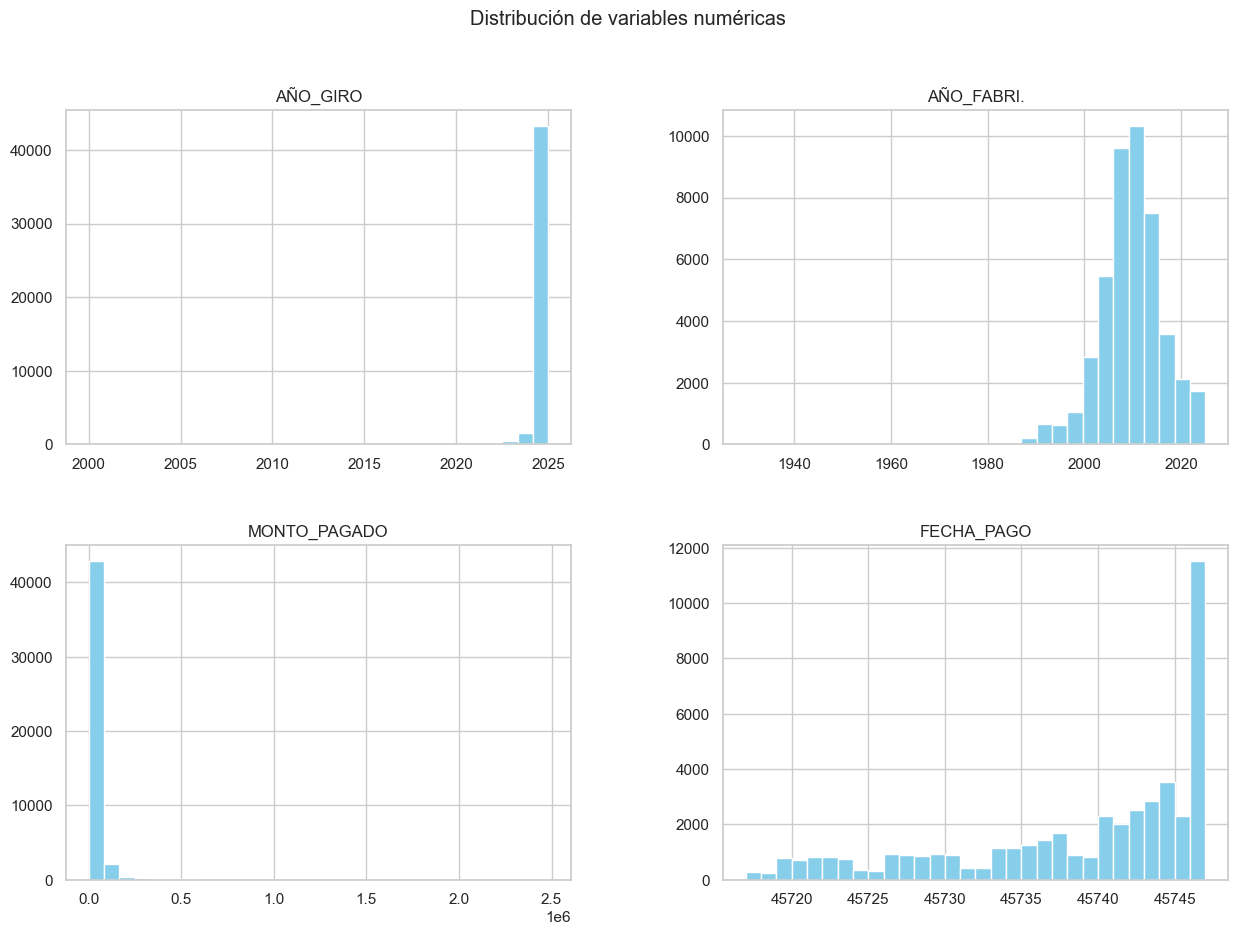

PATENTE: 43656 valores únicos
TIPO_PAGO: 3 valores únicos
MODULO_ATENCION: 2 valores únicos
TIPO_VEHICULO: 35 valores únicos
MARCA: 320 valores únicos
MODELO: 9354 valores únicos
COLOR: 1228 valores únicos
CODIGO_SII: 6119 valores únicos


In [9]:
# Histograma de variables numéricas
df.hist(bins=30, figsize=(15,10), color="skyblue")
plt.suptitle("Distribución de variables numéricas")
plt.show()

# Valores únicos por columna
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} valores únicos")



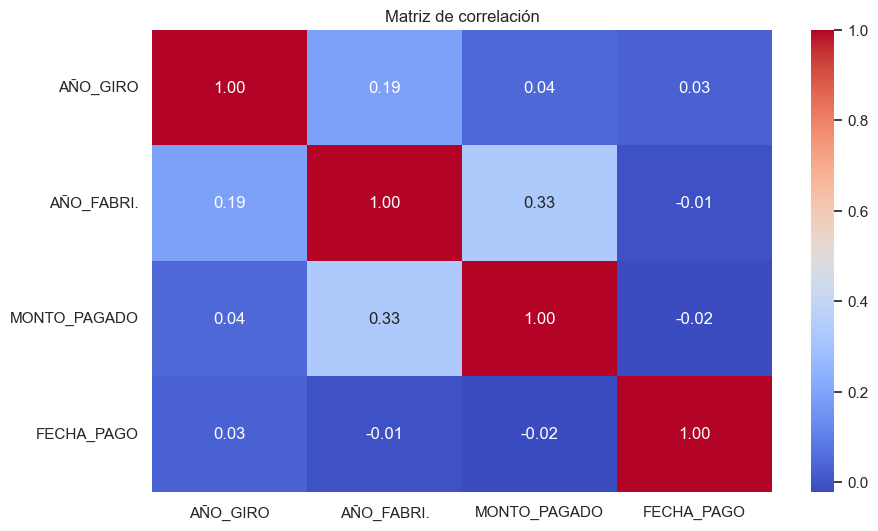

In [10]:
# Correlaciones (para variables numéricas)

correlation = df.select_dtypes(include=['number']).corr()

sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


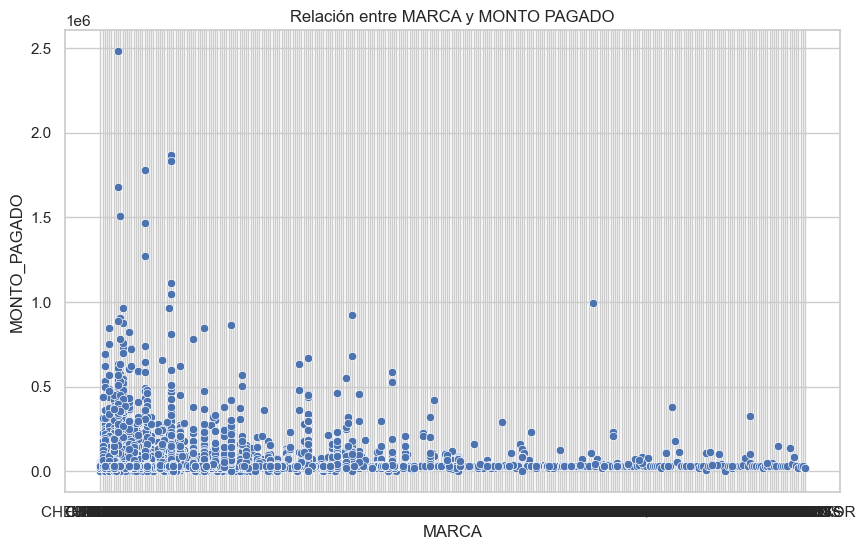

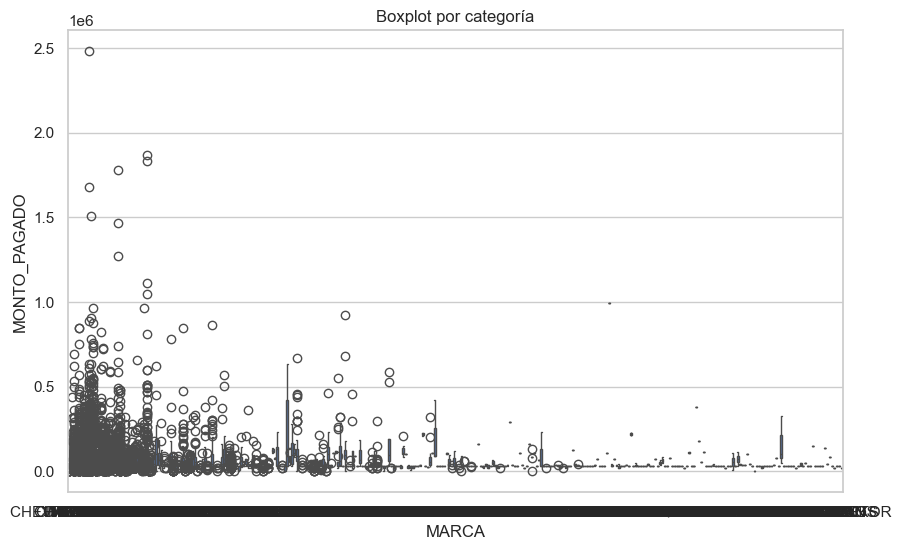

In [11]:
# Relación entre variables

# Scatter plot entre dos variables
sns.scatterplot(data=df, x='MARCA', y='MONTO_PAGADO')
plt.title("Relación entre MARCA y MONTO PAGADO")
plt.show()

# Boxplot para ver distribución por categoría
sns.boxplot(data=df, x='MARCA', y='MONTO_PAGADO')
plt.title("Boxplot por categoría")
plt.show()
